### performing model comparison on behavioral data fit to model 1 & model 2

In [1]:
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import math
import os

from matplotlib import pyplot
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
os.getcwd()

'/Users/jackiebeltran/Documents/GitHub/RP_Learning/1_scripts/analysis'

## HC

In [3]:
### load parameter data  -- for either HC or MDD

m1_data = pd.read_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/model_1/HC_parameters.csv')

In [7]:
m2_data = pd.read_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/model_2/HC_parameters.csv')

#### preproc

In [8]:
m1_data.columns
m2_data.columns

Index(['Unnamed: 0', 'sub_ID', 'initial_alpha_conditions',
       'initial_beta_conditions', 'fit_alpha', 'fit_beta', 'log_likelihood',
       'BIC_model1', 'likelihood_per_trial', 'Iteration'],
      dtype='object')

In [ ]:
m1_data.rename(columns = {'sub_ID':'subject_ID'}, inplace = True)
m1_data.columns

In [ ]:
# model 1 
col_name = ['BIC_model1']

m1=m1_data[col_name]

m1["model"] = "model_1" # add a column 

m1['subject'] = range(1, len(m1_data) + 1)

m1

In [ ]:
# model 2 

col_name = ['BIC_model2']

m2=m2_data[col_name]

m2["model"] = "model_2" # add a column 

m2['subject'] = range(1, len(m2_data) + 1)

m2

In [ ]:
# comparison of model bics 

bic_comparison = pd.concat([m1, m2], axis=1)
bic_comparison = bic_comparison[["subject", "BIC_model1", "BIC_model2"]]
bic_comparison

In [15]:
bic_comparison.to_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/HC_bic_comparison.csv')

In [16]:
m1_bics = pd.melt(m1, id_vars=['subject', 'model'],
              var_name='Model', value_name='BIC')
m1_bics

m2_bics = pd.melt(m2, id_vars=['subject', 'model'],
              var_name='Model', value_name='BIC')
m2_bics

,subject,model,Model,BIC
0,1,model_2,BIC_model2,97.137240
1,2,model_2,BIC_model2,110.555619
2,3,model_2,BIC_model2,87.985488
3,4,model_2,BIC_model2,88.204406
4,5,model_2,BIC_model2,83.160039
5,6,model_2,BIC_model2,94.931040
6,7,model_2,BIC_model2,135.985936
7,8,model_2,BIC_model2,105.229518
8,9,model_2,BIC_model2,103.855179
9,10,model_2,BIC_model2,103.399507


In [17]:
df =pd.concat([m1_bics, m2_bics], axis=0)

In [18]:
df

,subject,model,Model,BIC
0,1,model_1,BIC_model1,95.879971
1,2,model_1,BIC_model1,106.873083
2,3,model_1,BIC_model1,84.946063
3,4,model_1,BIC_model1,88.950404
4,5,model_1,BIC_model1,78.781222
...,...,...,...,...
33,34,model_2,BIC_model2,111.658877
34,35,model_2,BIC_model2,136.163131
35,36,model_2,BIC_model2,67.567017
36,37,model_2,BIC_model2,129.273616


### plots

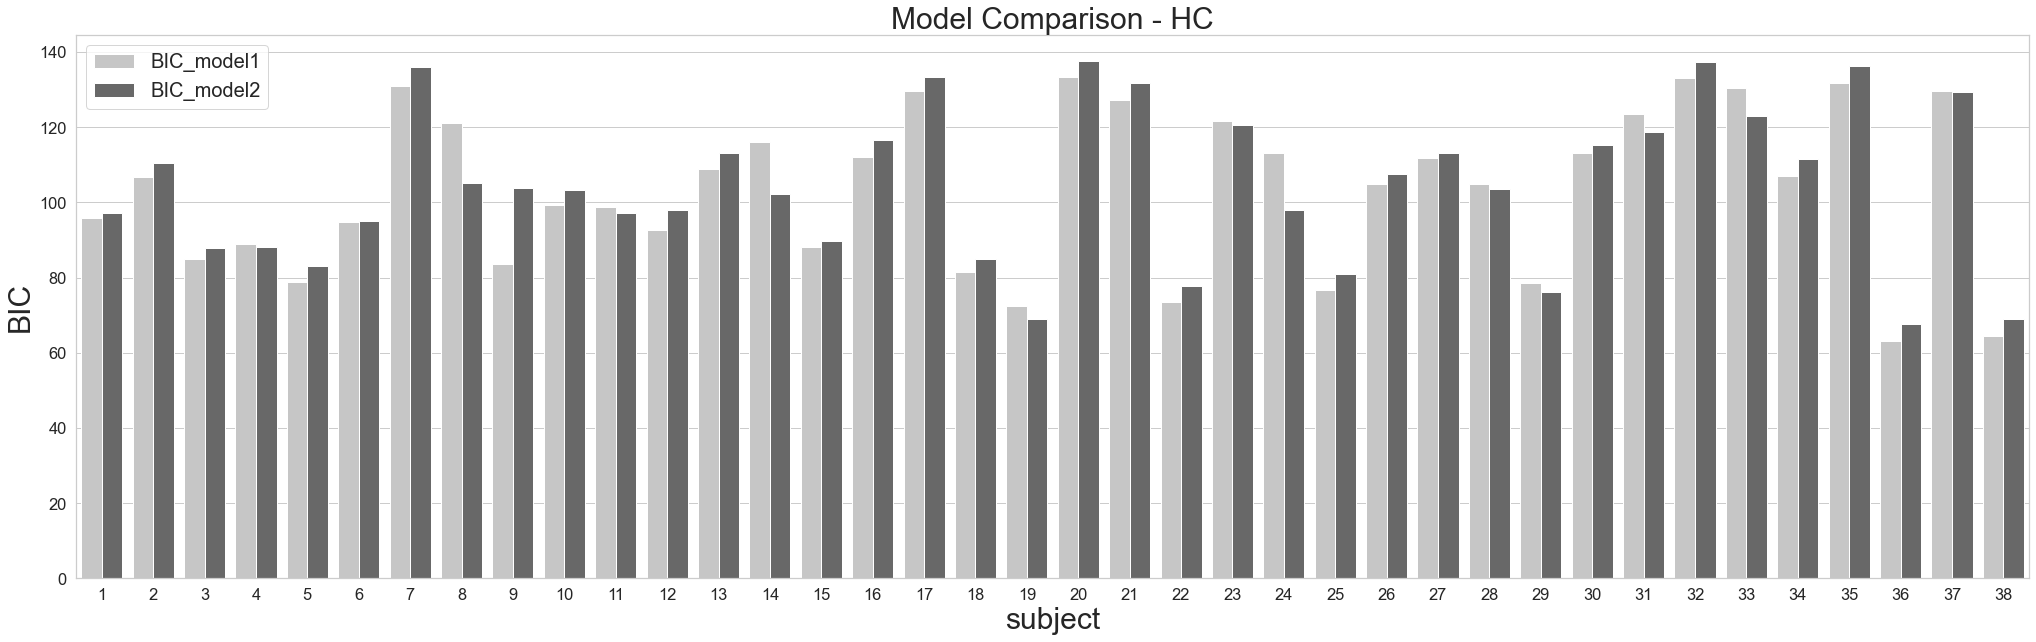

In [19]:
# dimensions

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

a4_dims = (35, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data=df, palette= "Greys", x="subject", y="BIC", hue = "Model")

# plt.xticks([49, 99, 149, 199, 249, 299])

# Set label for x-axis
ax.set_xlabel( "subject" , size = 30 )
  
# Set label for y-axis
ax.set_ylabel( "BIC" , size = 30 )
  
# Set title for plot
ax.set_title( "Model Comparison - HC" , size = 30 )

plt.legend(loc='best', fontsize = 20)

In [20]:
# model 1
count = (bic_comparison['BIC_model1'] < bic_comparison['BIC_model2']).sum()    
print("model 1 BIC: ")
print(str(count) + " subjects have a lower BIC for model 1 than model 2")

# model 2, 0
count = (bic_comparison['BIC_model2'] < bic_comparison['BIC_model1']).sum() 
print("model 2 BIC: ")
print(str(count) + " subjects have a lower BIC for model 2 than model 1" )

model 1 BIC: 
26 subjects have a lower BIC for model 1 than model 2
model 2 BIC: 
12 subjects have a lower BIC for model 2 than model 1


### paired sample t test

In [21]:
import scipy.stats as stats

In [22]:
m1_bic = bic_comparison[["BIC_model1"]]
m2_bic = bic_comparison[["BIC_model2"]]

t_statistic, p_value = stats.ttest_rel(m1_bic, m2_bic)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value) # no significant difference


T-statistic: [-1.09195002]
P-value: [0.28191451]


## MDD

In [23]:
### load parameter data  -- for MDD

m1_data = pd.read_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/model_1/MDD_parameters.csv')
m2_data = pd.read_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/model_2/MDD_parameters.csv')

### preproc

In [24]:
m1_data.columns
m2_data.columns

m1_data.rename(columns = {'sub_ID':'subject_ID'}, inplace = True)
m1_data.columns

Index(['Unnamed: 0', 'sub_ID', 'initial_alpha_conditions',
       'initial_beta_conditions', 'fit_alpha', 'fit_beta', 'log_likelihood',
       'BIC_model1', 'likelihood_per_trial', 'Iteration'],
      dtype='object')

In [ ]:
# model 1 
col_name = ['BIC_model1']

m1=m1_data[col_name]

m1["model"] = "model_1" # add a column 

m1['subject'] = range(1, len(m1_data) + 1)

m1

In [ ]:
# model 2 

col_name = ['BIC_model2']

m2=m2_data[col_name]

m2["model"] = "model_2" # add a column 

m2['subject'] = range(1, len(m2_data) + 1)

m2

In [ ]:
# comparison of model bics 

bic_comparison = pd.concat([m1, m2], axis=1)
bic_comparison = bic_comparison[["subject", "BIC_model1", "BIC_model2"]]
bic_comparison

In [32]:
bic_comparison.to_csv(f'/Users/jackiebeltran/Documents/GitHub/RP_Learning/3_results/MDD_bic_comparison.csv')

In [35]:
m1_bics = pd.melt(m1, id_vars=['subject', 'model'],
              var_name='Model', value_name='BIC')
m1_bics

m2_bics = pd.melt(m2, id_vars=['subject', 'model'],
              var_name='Model', value_name='BIC')
m2_bics

,subject,model,Model,BIC
0,1,model_2,BIC_model2,88.080751
1,2,model_2,BIC_model2,104.640718
2,3,model_2,BIC_model2,138.265923
3,4,model_2,BIC_model2,99.775113
4,5,model_2,BIC_model2,115.987250
5,6,model_2,BIC_model2,73.973323
6,7,model_2,BIC_model2,83.814641
7,8,model_2,BIC_model2,97.572554
8,9,model_2,BIC_model2,126.118911
9,10,model_2,BIC_model2,83.394640


In [36]:
df =pd.concat([m1_bics, m2_bics], axis=0)

In [37]:
df

,subject,model,Model,BIC
0,1,model_1,BIC_model1,84.390029
1,2,model_1,BIC_model1,101.211665
2,3,model_1,BIC_model1,133.766133
3,4,model_1,BIC_model1,97.725203
4,5,model_1,BIC_model1,110.863927
...,...,...,...,...
34,35,model_2,BIC_model2,116.588237
35,36,model_2,BIC_model2,107.562853
36,37,model_2,BIC_model2,85.091736
37,38,model_2,BIC_model2,89.286550


### plots

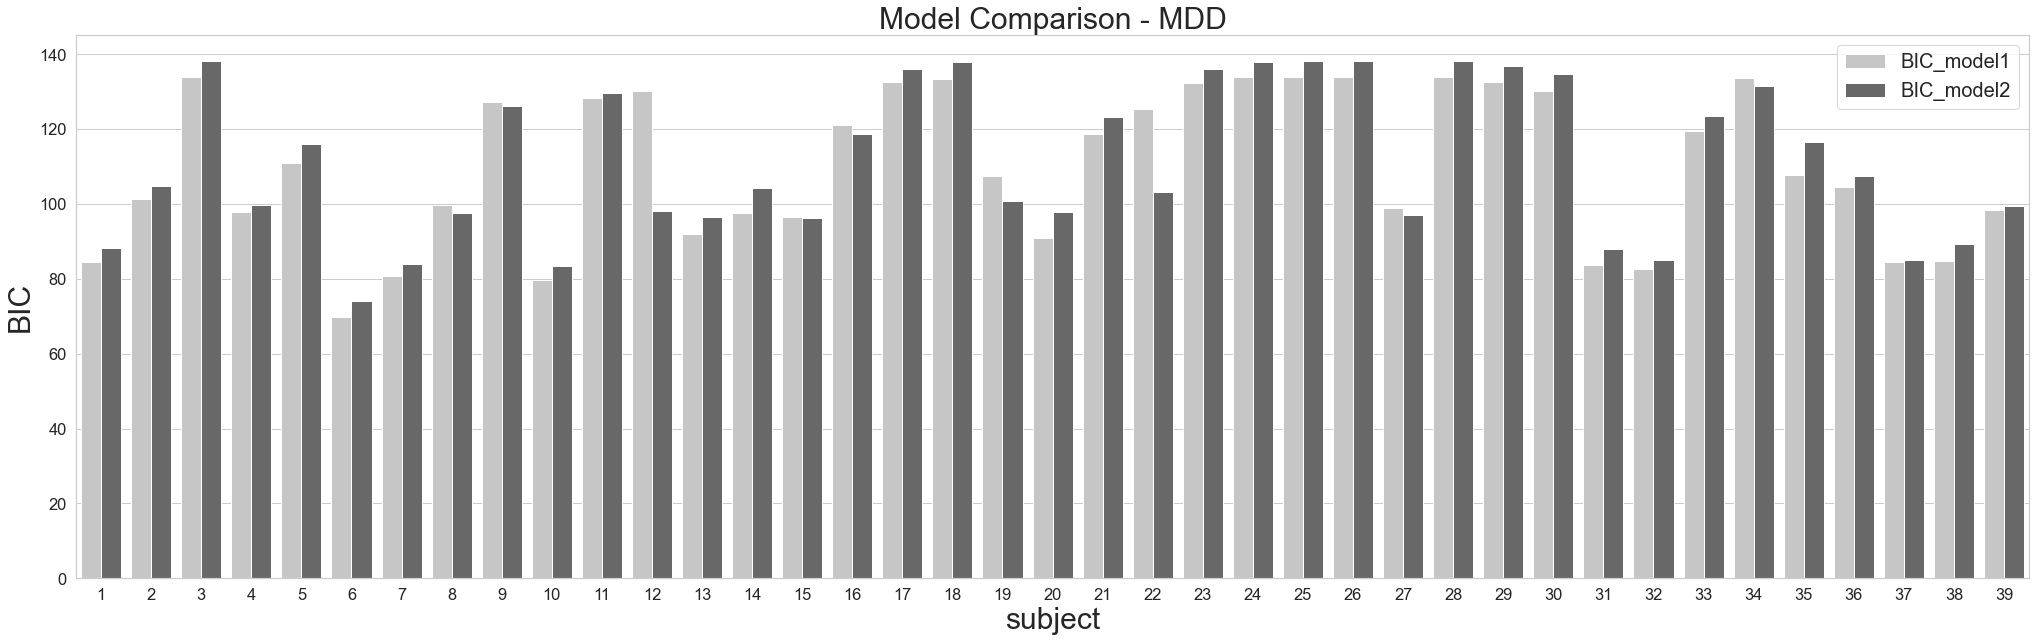

In [38]:
# dimensions

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

a4_dims = (35, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(data=df, palette= "Greys", x="subject", y="BIC", hue = "Model")

# plt.xticks([49, 99, 149, 199, 249, 299])

# Set label for x-axis
ax.set_xlabel( "subject" , size = 30 )
  
# Set label for y-axis
ax.set_ylabel( "BIC" , size = 30 )
  
# Set title for plot
ax.set_title( "Model Comparison - MDD" , size = 30 )

plt.legend(loc='best', fontsize = 20)

In [39]:
# model 1
count = (bic_comparison['BIC_model1'] < bic_comparison['BIC_model2']).sum()    
print("model 1 BIC: ")
print(str(count) + " subjects have a lower BIC for model 1 than model 2")

# model 2, 0
count = (bic_comparison['BIC_model2'] < bic_comparison['BIC_model1']).sum() 
print("model 2 BIC: ")
print(str(count) + " subjects have a lower BIC for model 2 than model 1" )

model 1 BIC: 
30 subjects have a lower BIC for model 1 than model 2
model 2 BIC: 
9 subjects have a lower BIC for model 2 than model 1


### t test

In [40]:
m1_bic = bic_comparison[["BIC_model1"]]
m2_bic = bic_comparison[["BIC_model2"]]

t_statistic, p_value = stats.ttest_rel(m1_bic, m2_bic)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value) # no significant difference


T-statistic: [-1.09993836]
P-value: [0.27827856]
